In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [63]:
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [64]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


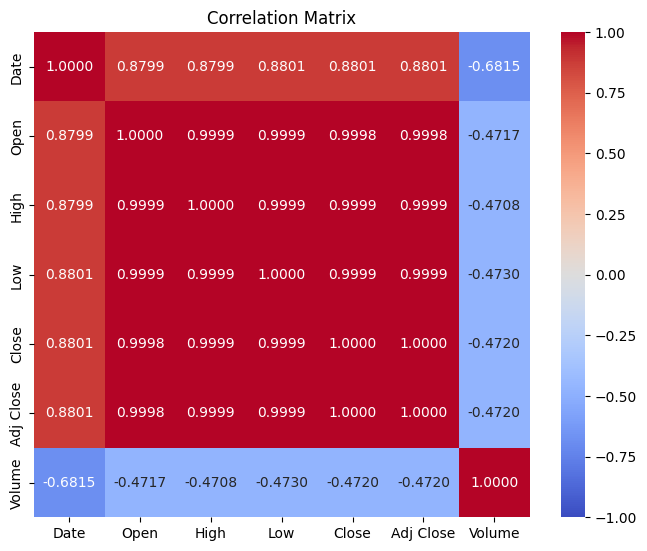

In [66]:
df['Date'] = pd.to_datetime(df['Date'])

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6.3))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

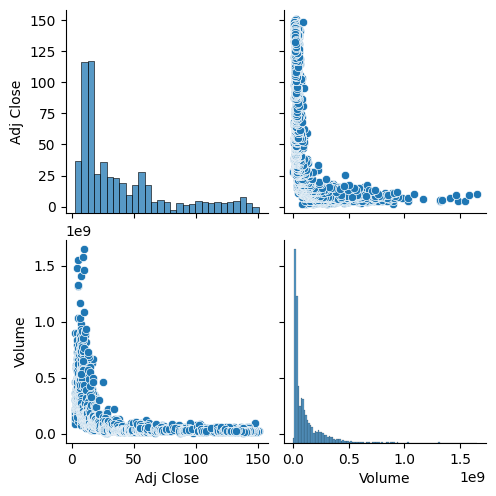

In [67]:
df_selected = df[['Adj Close', 'Volume']]

pairplot = sns.pairplot(df_selected)

plt.show()

In [68]:
df = df.drop(['Close'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [69]:
features = df[['Open', 'High', 'Volume', 'Low']]
target = df['Adj Close']

In [70]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [71]:
X = np.array(features_scaled)
y = np.array(target)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [74]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [75]:
window_size = 1

In [76]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [77]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 50)             11000     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 32501 (126.96 KB)
Trainable params: 32501 (126.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, epochs=55, batch_size=32)

Epoch 1/55
122/122 [==============================] - 6s 4ms/step - loss: 2428.1028
Epoch 2/55
122/122 [==============================] - 1s 4ms/step - loss: 259.2053
Epoch 3/55
122/122 [==============================] - 1s 5ms/step - loss: 22.1560
Epoch 4/55
122/122 [==============================] - 1s 5ms/step - loss: 11.6625
Epoch 5/55
122/122 [==============================] - 1s 5ms/step - loss: 8.7670
Epoch 6/55
122/122 [==============================] - 1s 4ms/step - loss: 7.4408
Epoch 7/55
122/122 [==============================] - 1s 5ms/step - loss: 6.5884
Epoch 8/55
122/122 [==============================] - 1s 4ms/step - loss: 6.0665
Epoch 9/55
122/122 [==============================] - 1s 5ms/step - loss: 5.6310
Epoch 10/55
122/122 [==============================] - 1s 4ms/step - loss: 5.2183
Epoch 11/55
122/122 [==============================] - 1s 5ms/step - loss: 5.0477
Epoch 12/55
122/122 [==============================] - 1s 5ms/step - loss: 4.7274
Epoch 13/55
122/12

In [79]:
predictions = model.predict(X_test)

31/31 [==============================] - 1s 3ms/step


In [80]:
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 55.96708557809767


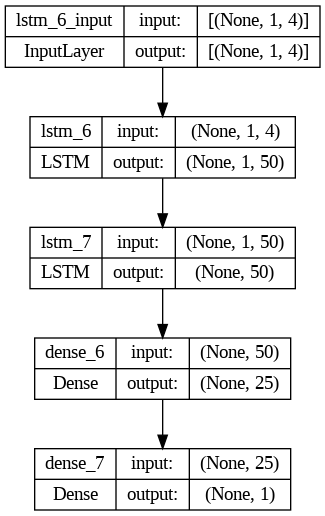

In [81]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)